# Data Collection
## Installation of the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

## Load the dataset

In [2]:
df = pd.read_csv("heart.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data pre-processing and selection

C:\Users\Acer\AppData\Local\Temp\ipykernel_5708\577129034.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


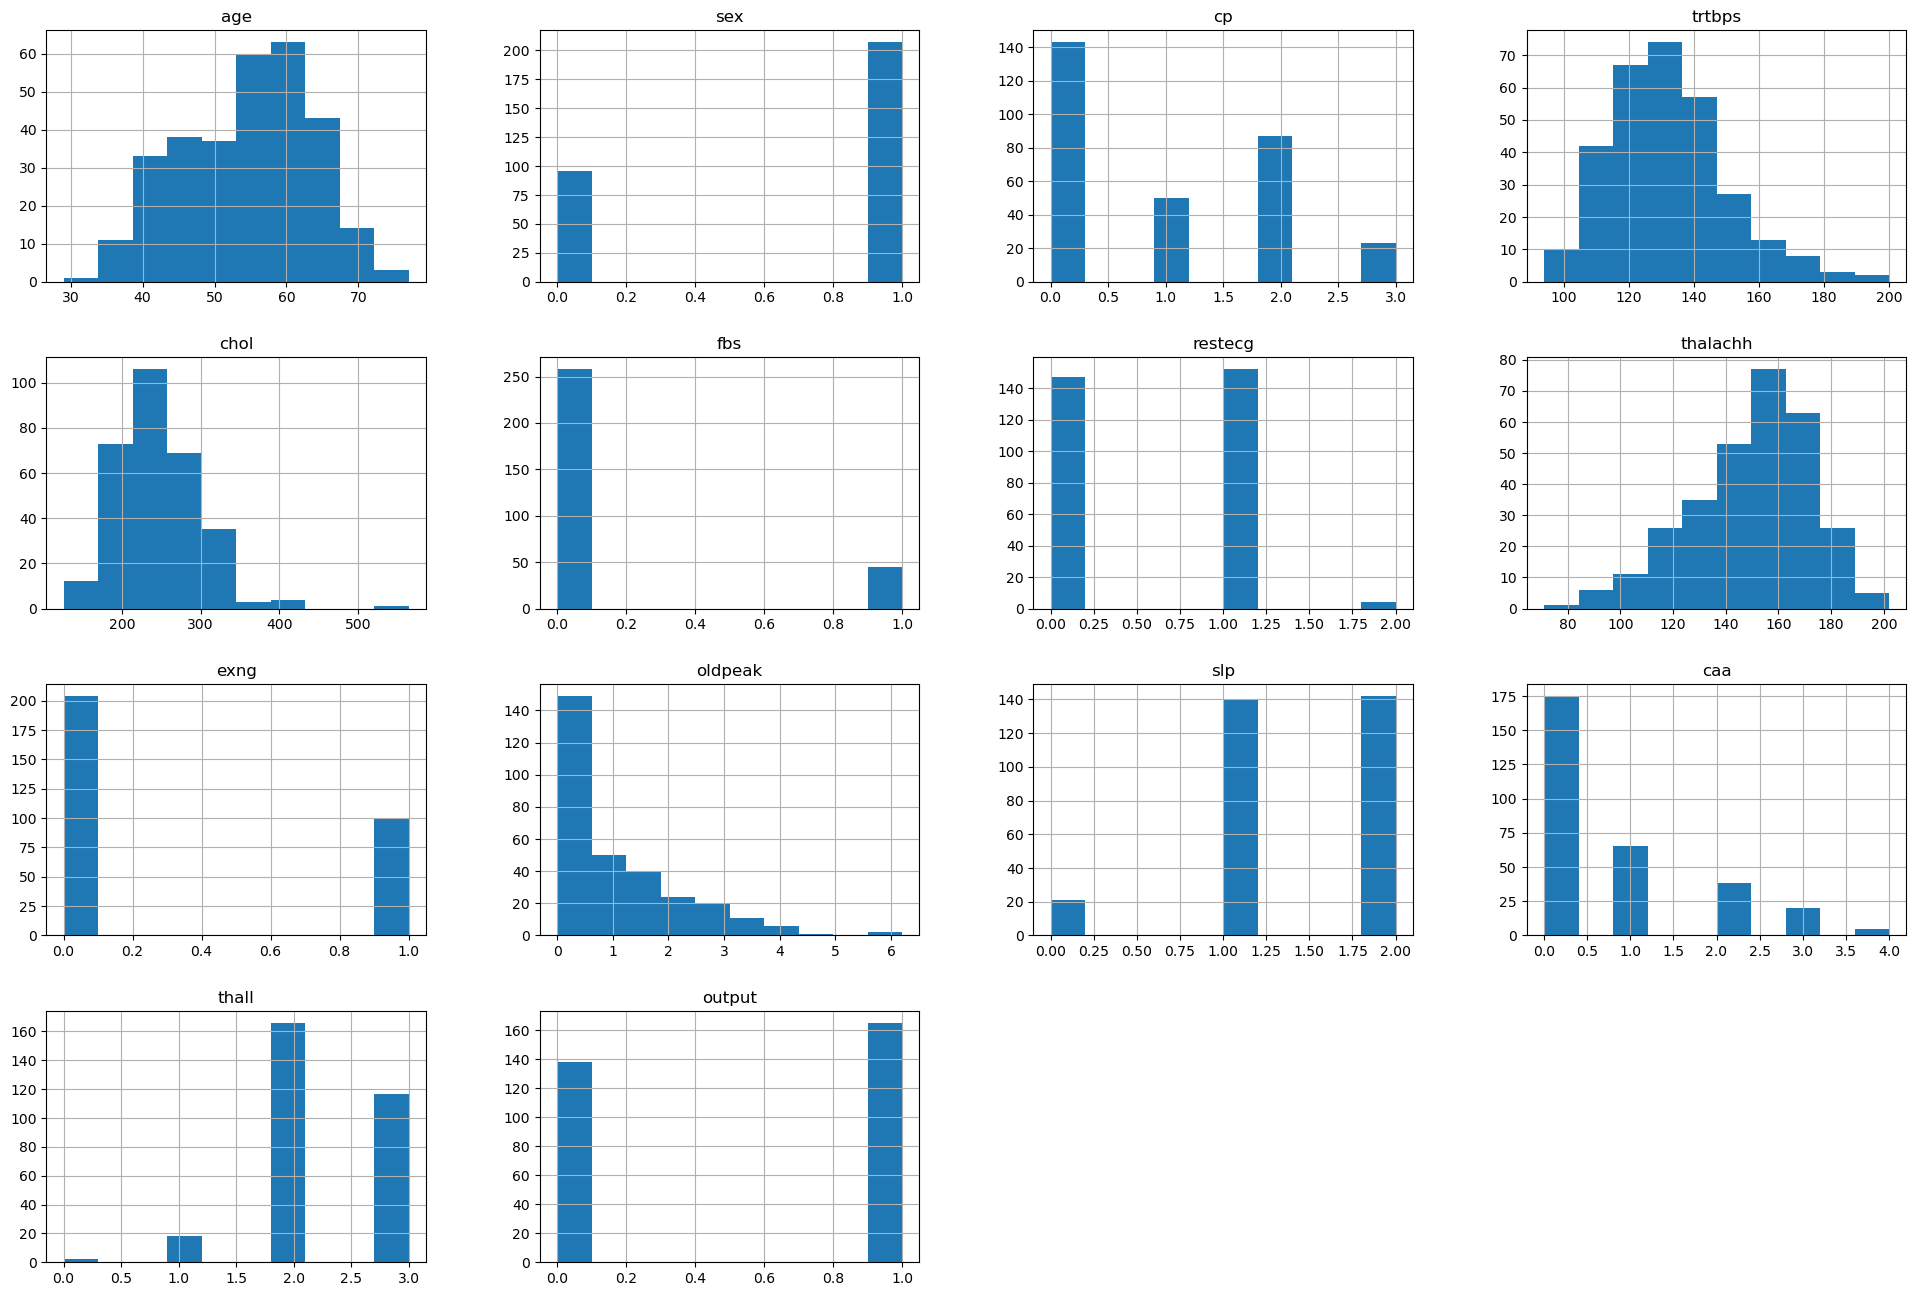

In [3]:
fig, ax = plt.subplots(figsize=(24, 16))
df.hist(ax=ax)
plt.show()

1. (cp) type of chest pain:
    1. Value 1: direct heart pain
    2. Value 2: Indirect pain that leads to feeling pain in the heart
    3. Value 3: non-cardiac pain
    4. Value 4: No symptoms
2. (trtbps) resting blood pressure.
3. (chol) blood fat.
4. (fbs) diabetes - High fasting blood sugar.(One for have it, Zero for None) 
5. (rest_ecg) The result of the resting ECG:
    1. Zero value: normal
    2. Value one: the ST segment of the ECG is abnormal
    3. Value two: Probably or definitely the left ventricle is large
6. (thalach) maximum heart rate.
7. (exng) Does the pain start with a specific activity?(One for yes, Zero for no)
8. (oldpeak) 
9. (slp)
10. (caa) Number of main vessels.(A value from zero to three)
11. (thall)
12. output_ chance of heart attack (target):
    1. Zero value: low chance
    2. Value one: high chance

In [4]:
feature_df = df[['cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'caa']]
X = np.asarray(feature_df)
Y = np.asarray(df['output'])
print(X [0:5])
print(Y [0:5])

[[  3 145 233   1   0 150   0   0]
 [  2 130 250   0   1 187   0   0]
 [  1 130 204   0   0 172   0   0]
 [  1 120 236   0   1 178   0   0]
 [  0 120 354   0   1 163   1   0]]
[1 1 1 1 1]


## Normalize dataset

In [5]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X [0:5]

array([[ 1.97312292,  0.76395577, -0.25633371,  2.394438  , -1.00583187,
         0.01544279, -0.69663055, -0.71442887],
       [ 1.00257707, -0.09273778,  0.07219949, -0.41763453,  0.89896224,
         1.63347147, -0.69663055, -0.71442887],
       [ 0.03203122, -0.09273778, -0.81677269, -0.41763453, -1.00583187,
         0.97751389, -0.69663055, -0.71442887],
       [ 0.03203122, -0.66386682, -0.19835726, -0.41763453,  0.89896224,
         1.23989692, -0.69663055, -0.71442887],
       [-0.93851463, -0.66386682,  2.08204965, -0.41763453,  0.89896224,
         0.58393935,  1.43548113, -0.71442887]])

## Train/Test dataset

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (242, 8) (242,)
Test set: (61, 8) (61,)


## Confusion_matrix def 

In [7]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=15, pad=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# KNN
##  Model training and prediction

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
def neigh_predict(k, x_test):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    pred_k = knn.predict(x_test)
    return pred_k

example_k = 10
a = neigh_predict(example_k, x_test)
print ('Our prediction: ', a [0:5])
print ('Our real answer: ', y_test [0:5])

Our prediction:  [1 0 1 1 1]
Our real answer:  [1 0 1 1 0]


## Model Evaluation

In [10]:
KNN_y_train = neigh_predict(example_k, x_train)
KNN_y_test = neigh_predict(example_k, x_test)
print("KNN Train set Accuracy: ")
print (classification_report(y_train, KNN_y_train))
print ()
print("KNN Test set Accuracy: ")
print (classification_report(y_test, KNN_y_test))

KNN Train set Accuracy: 
              precision    recall  f1-score   support

           0       0.81      0.73      0.77       113
           1       0.78      0.84      0.81       129

    accuracy                           0.79       242
   macro avg       0.79      0.79      0.79       242
weighted avg       0.79      0.79      0.79       242


KNN Test set Accuracy: 
              precision    recall  f1-score   support

           0       0.87      0.80      0.83        25
           1       0.87      0.92      0.89        36

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.86        61
weighted avg       0.87      0.87      0.87        61



## Model improvement

Maximum test accuracy:  0.902 at K = 27


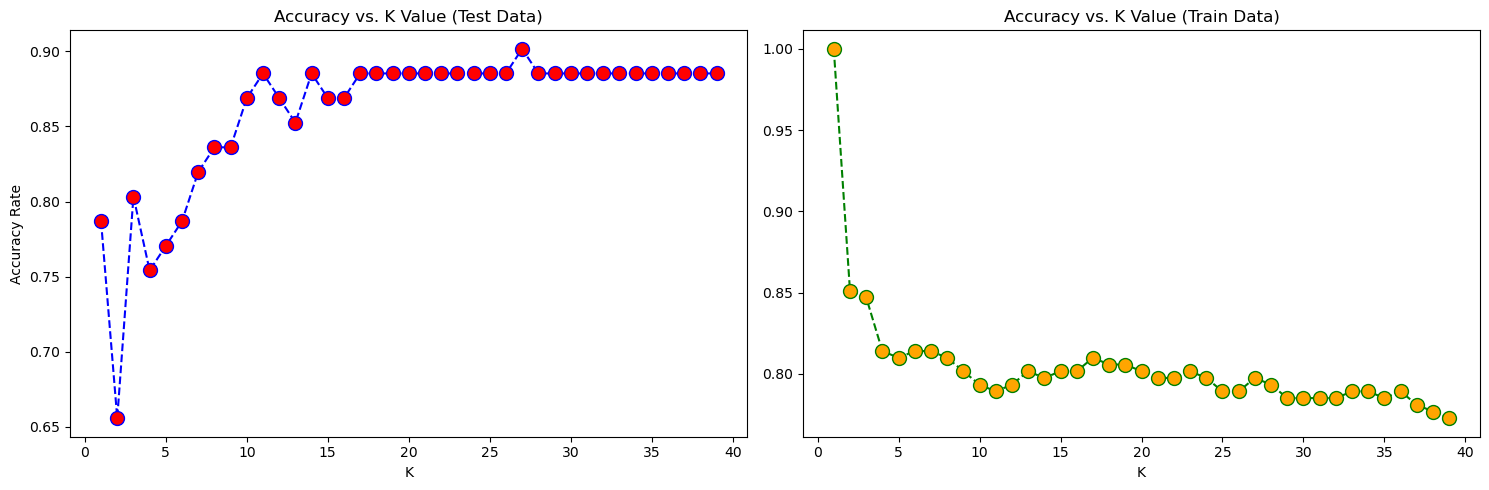

In [11]:
acc_rate_test = []
for i in range(1,40):
    pred = neigh_predict(i,x_test)
    a = metrics.accuracy_score(y_test, pred) 
    acc_rate_test.append(a)
    
acc_rate_train = []
for i in range(1,40):
    pred = neigh_predict(i, x_train)
    a = metrics.accuracy_score(y_train, pred)
    acc_rate_train.append(a)

a = float('%.3f' % max(acc_rate_test))
print("Maximum test accuracy: ",a ,"at K =",1 + acc_rate_test.index(max(acc_rate_test)))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(range(1, 40), acc_rate_test, color='blue', linestyle='dashed', 
         marker='o', markerfacecolor='red', markersize=10)
ax1.set_title('Accuracy vs. K Value (Test Data)')
ax1.set_xlabel('K')
ax1.set_ylabel('Accuracy Rate')

ax2.plot(range(1, 40), acc_rate_train, color='green', linestyle='dashed', 
         marker='o', markerfacecolor='orange', markersize=10)
ax2.set_title('Accuracy vs. K Value (Train Data)')
ax2.set_xlabel('K')

plt.tight_layout()
plt.show()

## Confusion matrix
for our new model

Confusion matrix, without normalization


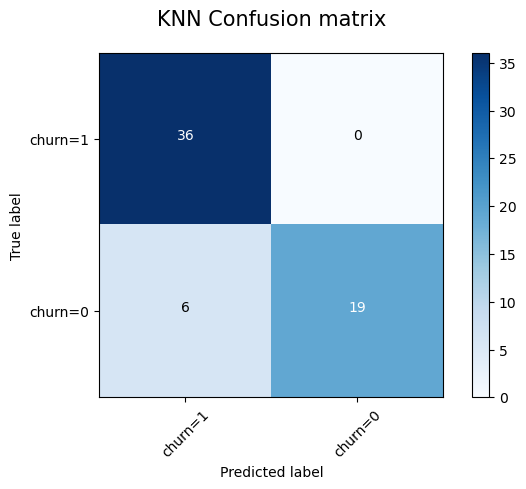

In [12]:
KNN_y_test = neigh_predict(27, x_test)
cnf_matrix = confusion_matrix(y_test, KNN_y_test, labels=[1,0])
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'], 
                      normalize= False, title='KNN Confusion matrix')

# DecisionTree
##  Model training and prediction

In [13]:
from sklearn.tree import DecisionTreeClassifier

def DT_predict(md, x_test):
    drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = md)
    drugTree.fit(x_train,y_train)
    pred = drugTree.predict(x_test)
    return pred ,drugTree

example_md = 3
a = DT_predict(example_md, x_test)
print ('Our prediction: ', a[0] [0:5])
print ('Our real answer: ', y_test [0:5])

Our prediction:  [1 1 1 1 1]
Our real answer:  [1 0 1 1 0]


## Model Evaluation

In [14]:
DT_y_train = DT_predict(example_md, x_train)[0]
DT_y_test = DT_predict(example_md, x_test)[0]
print("DecisionTrees's train Accuracy: ")
print (classification_report(y_train, DT_y_train))
print("DecisionTrees's test Accuracy: ")
print (classification_report(y_test, DT_y_test))

DecisionTrees's train Accuracy: 
              precision    recall  f1-score   support

           0       0.87      0.72      0.79       113
           1       0.79      0.91      0.84       129

    accuracy                           0.82       242
   macro avg       0.83      0.81      0.81       242
weighted avg       0.83      0.82      0.82       242

DecisionTrees's test Accuracy: 
              precision    recall  f1-score   support

           0       0.86      0.72      0.78        25
           1       0.82      0.92      0.87        36

    accuracy                           0.84        61
   macro avg       0.84      0.82      0.83        61
weighted avg       0.84      0.84      0.83        61



## Model improvement

Maximum test accuracy:  0.836 at Max_depth = 3


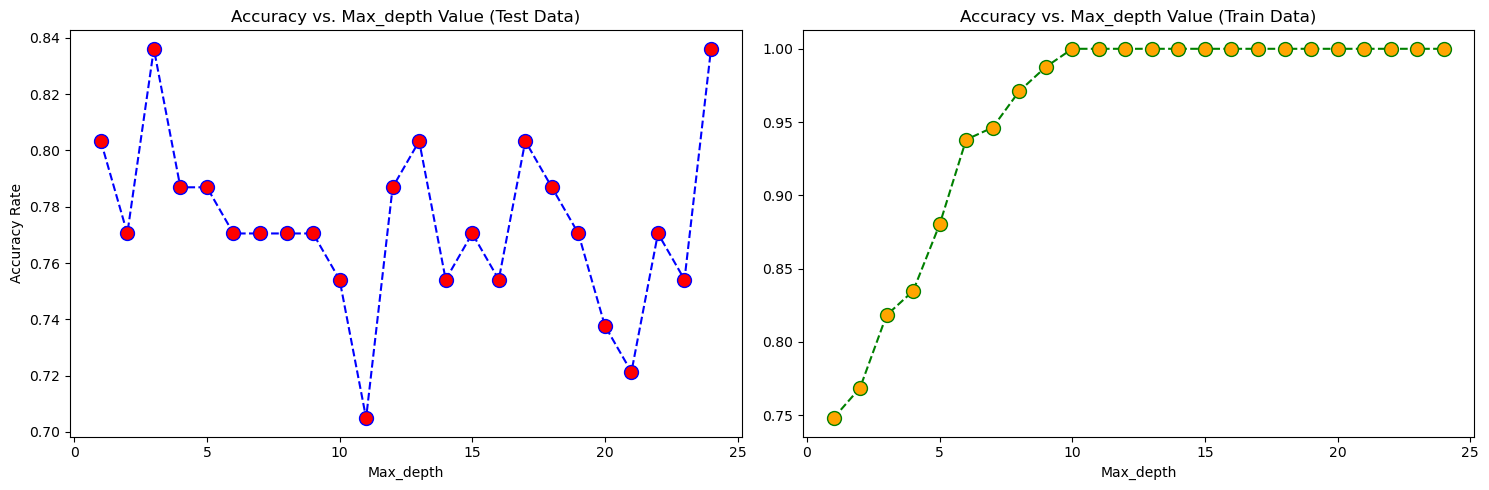

In [15]:
acc_rate_test = []
for i in range(1,25):
    pred = DT_predict(i, x_test)[0]
    a = metrics.accuracy_score(y_test, pred)
    acc_rate_test.append(a)

acc_rate_train = []
for i in range(1,25):
    pred = DT_predict(i, x_train)[0]
    a = metrics.accuracy_score(y_train, pred)
    acc_rate_train.append(a)

a = float('%.3f' % max(acc_rate_test))
print("Maximum test accuracy: ",a ,"at Max_depth =", 1 + acc_rate_test.index(max(acc_rate_test)))
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(range(1, 25), acc_rate_test, color='blue', linestyle='dashed', 
         marker='o', markerfacecolor='red', markersize=10)
ax1.set_title('Accuracy vs. Max_depth Value (Test Data)')
ax1.set_xlabel('Max_depth')
ax1.set_ylabel('Accuracy Rate')

ax2.plot(range(1, 25), acc_rate_train, color='green', linestyle='dashed', 
         marker='o', markerfacecolor='orange', markersize=10)
ax2.set_title('Accuracy vs. Max_depth Value (Train Data)')
ax2.set_xlabel('Max_depth')

plt.tight_layout()
plt.show()

## Confusion matrix

Confusion matrix, without normalization


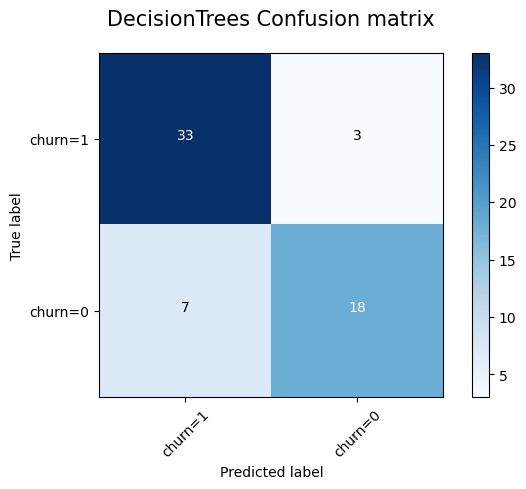

In [16]:
cnf_matrix = confusion_matrix(y_test, DT_y_test, labels=[1,0])
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'], 
                      normalize= False, title='DecisionTrees Confusion matrix')

## pydot plot

In [17]:
import pydotplus
import matplotlib.image as mpimg
from  io import StringIO
from sklearn import tree

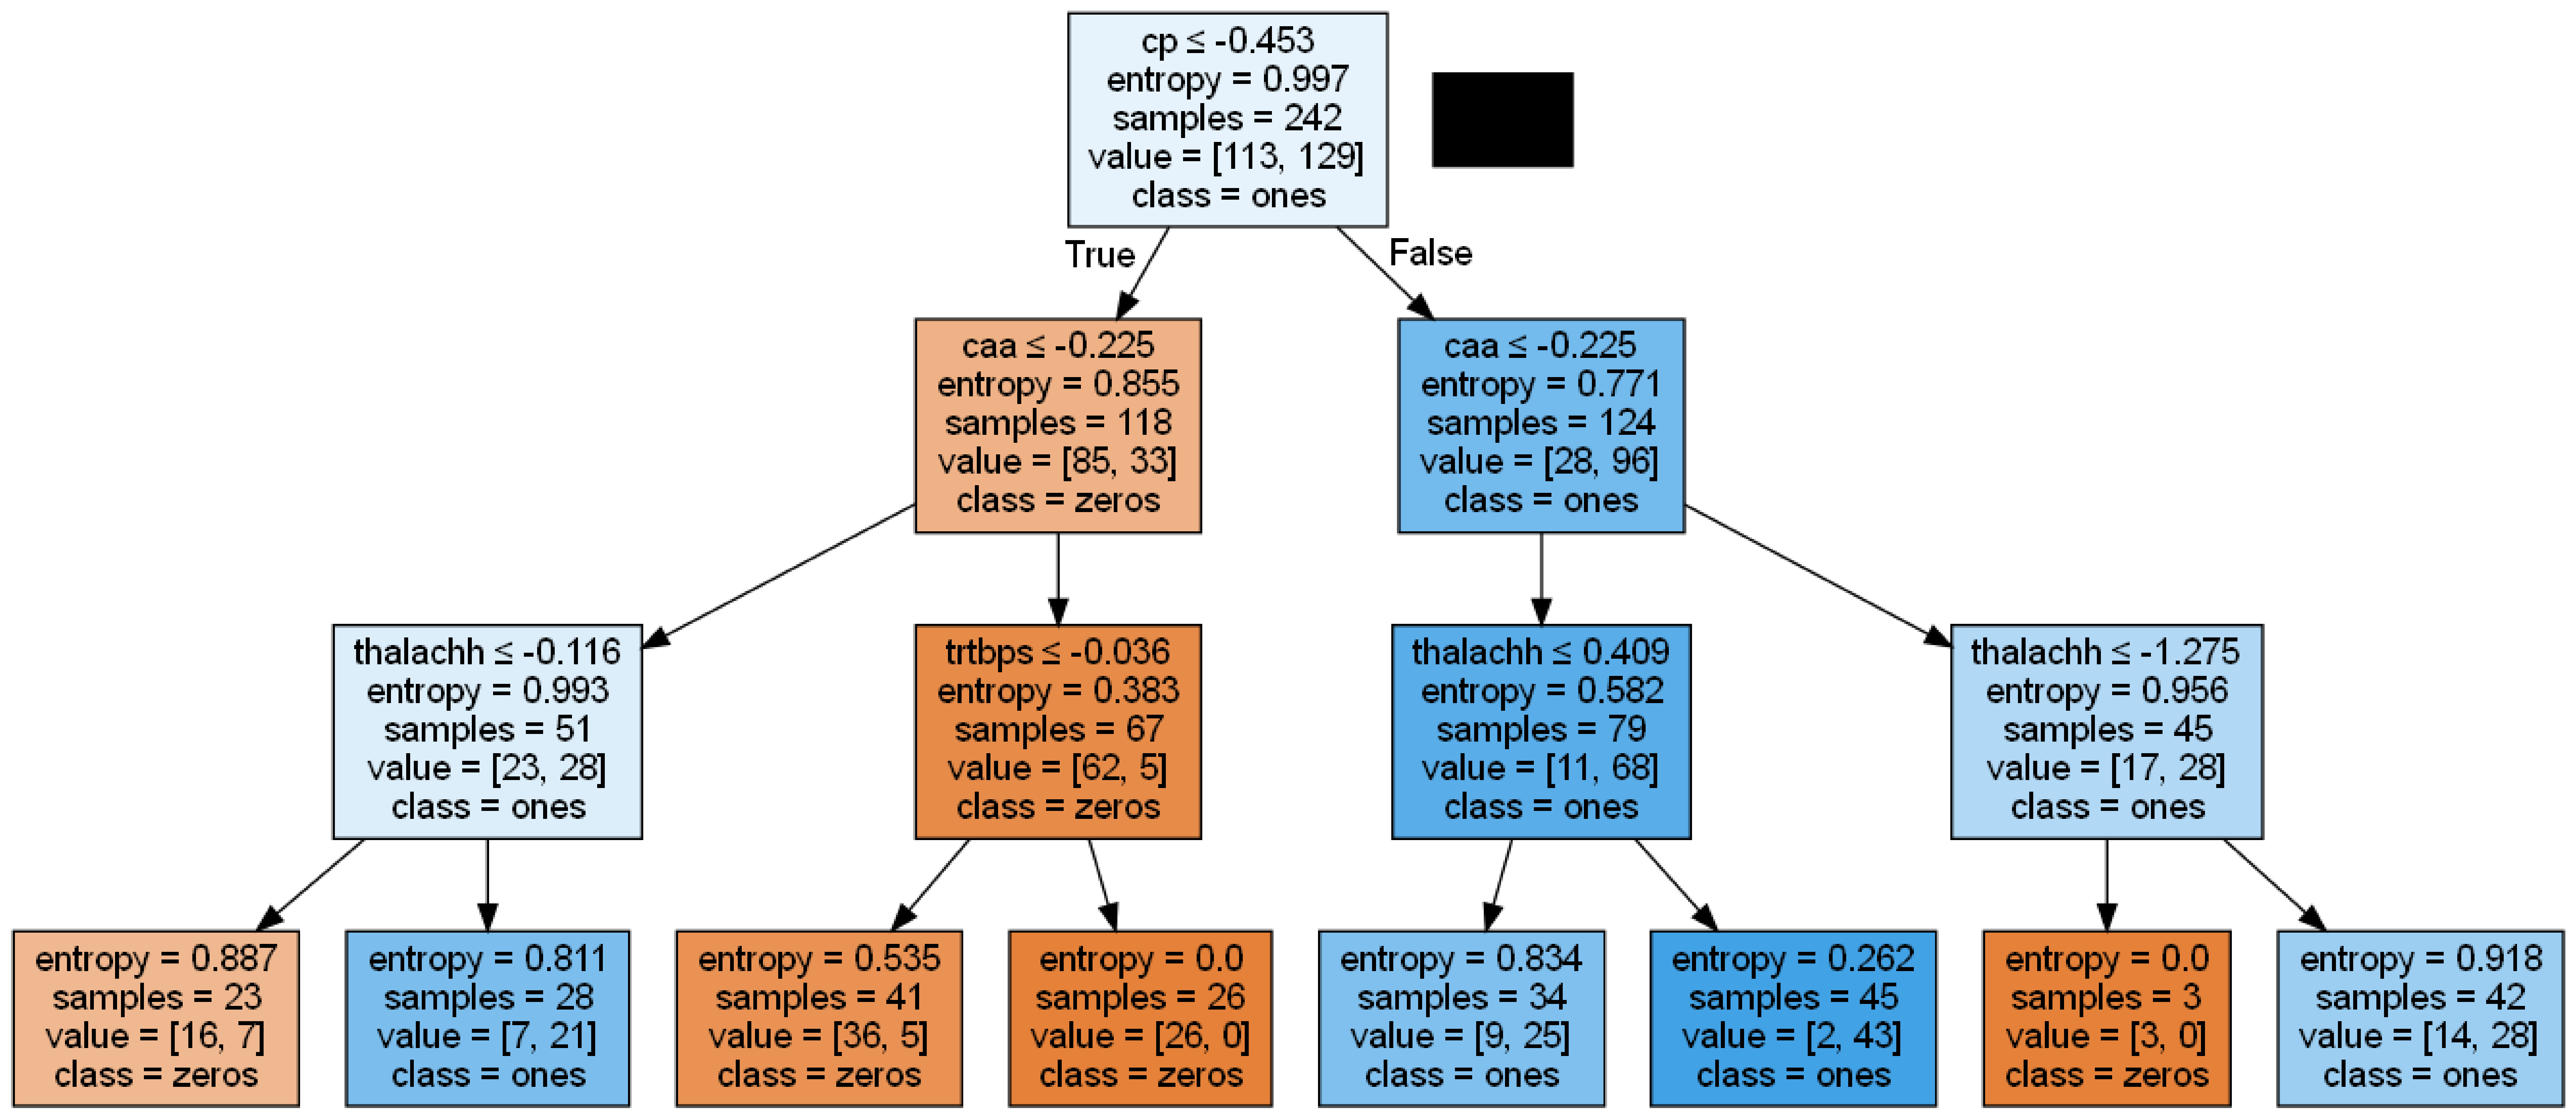

In [18]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = feature_df.columns
class_names = {0: "zeros", 1: "ones"}
dtree = DT_predict(3, x_test)[1]
out = tree.export_graphviz(dtree, feature_names = featureNames, out_file = dot_data, 
                         class_names = class_names, filled=True, special_characters=True, rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.axis('off')
plt.imshow(img,interpolation='nearest')

# LogisticRegression
##  Model training and prediction

In [19]:
from sklearn.linear_model import LogisticRegression

def LR_predict(solver, x_test):
    LR = LogisticRegression(C=0.01, solver=solver).fit(x_train,y_train)
    pred = LR.predict(x_test)
    return pred

example_solver = 'newton-cg'
a = LR_predict(example_solver ,x_test)
print ('Our prediction: ', a [0:5])
print ('Our real answer: ', y_test [0:5])

Our prediction:  [1 0 1 1 1]
Our real answer:  [1 0 1 1 0]


## Model Evaluation

In [20]:
LR_yhat_train = LR_predict(example_solver ,x_train)
LR_yhat_test = LR_predict(example_solver ,x_test)
print("LogesticReg's train Accuracy: ")
print (classification_report(y_train, LR_yhat_train))
print("LogesticReg's test Accuracy: ")
print (classification_report(y_test, LR_yhat_test))

LogesticReg's train Accuracy: 
              precision    recall  f1-score   support

           0       0.84      0.71      0.77       113
           1       0.78      0.88      0.83       129

    accuracy                           0.80       242
   macro avg       0.81      0.80      0.80       242
weighted avg       0.81      0.80      0.80       242

LogesticReg's test Accuracy: 
              precision    recall  f1-score   support

           0       1.00      0.76      0.86        25
           1       0.86      1.00      0.92        36

    accuracy                           0.90        61
   macro avg       0.93      0.88      0.89        61
weighted avg       0.92      0.90      0.90        61



## Model improvement

Maximum test accuracy:  0.902 at solver = newton-cg


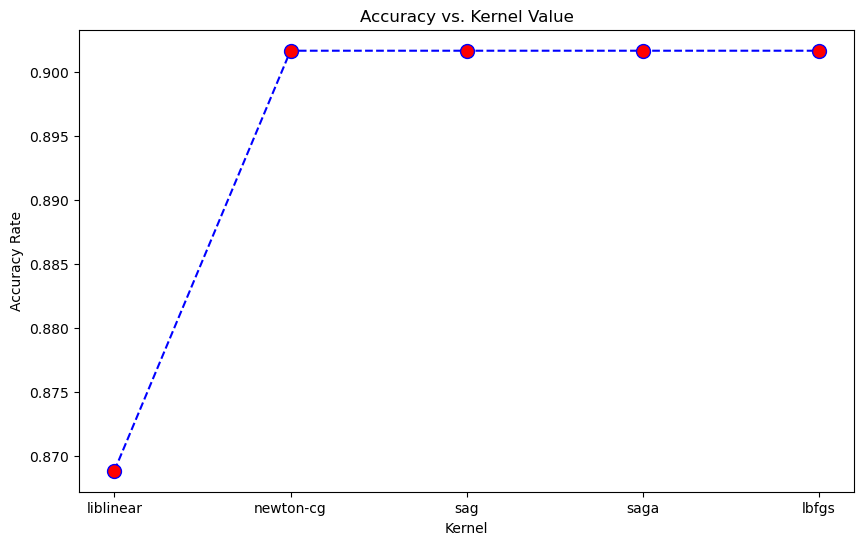

In [21]:
acc_rate = []
solver_list = ['liblinear', 'newton-cg', 'sag', 'saga','lbfgs']
for i in solver_list:
    pred = LR_predict(i, x_test)
    a = metrics.accuracy_score(y_test, pred)
    acc_rate.append(a)

plt.figure(figsize=(10,6))
plt.plot(solver_list, acc_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. Kernel Value')
plt.xlabel('Kernel')
plt.ylabel('Accuracy Rate')
a = float('%.3f' % max(acc_rate))
print("Maximum test accuracy: ",a ,"at solver =",solver_list[acc_rate.index(max(acc_rate))])

## Confusion matrix

Confusion matrix, without normalization


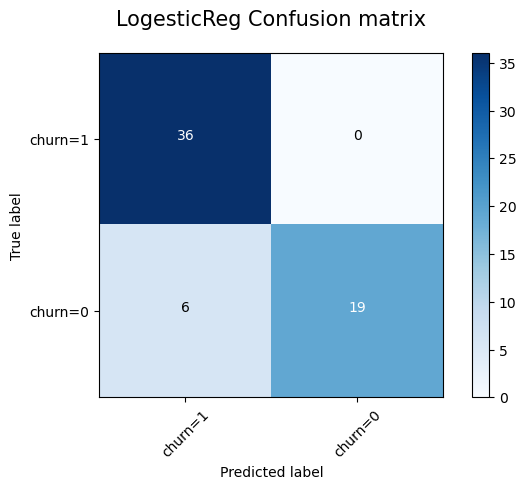

In [22]:
cnf_matrix = confusion_matrix(y_test, LR_yhat_test, labels=[1,0])
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'], 
                      normalize= False, title='LogesticReg Confusion matrix')

# SVM
##  Model training and prediction

In [23]:
from sklearn import svm

def SVM_predict(kernel, x_test):
    clf = svm.SVC(kernel = kernel)
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    return pred

example_kernel = 'rbf'
a = SVM_predict(example_kernel, x_test)
print ('Our prediction: ', a [0:5])
print ('Our real answer: ', y_test [0:5])

Our prediction:  [1 0 1 1 1]
Our real answer:  [1 0 1 1 0]


## Model Evaluation

In [24]:
SVM_yhat_train = SVM_predict(example_kernel, x_train)
SVM_yhat_test = SVM_predict(example_kernel, x_test)
print("SVM's train Accuracy: ")
print (classification_report(y_train, SVM_yhat_train))
print("SVM's test Accuracy: ")
print (classification_report(y_test, SVM_yhat_test))

SVM's train Accuracy: 
              precision    recall  f1-score   support

           0       0.89      0.77      0.82       113
           1       0.82      0.91      0.86       129

    accuracy                           0.85       242
   macro avg       0.85      0.84      0.84       242
weighted avg       0.85      0.85      0.85       242

SVM's test Accuracy: 
              precision    recall  f1-score   support

           0       0.95      0.76      0.84        25
           1       0.85      0.97      0.91        36

    accuracy                           0.89        61
   macro avg       0.90      0.87      0.88        61
weighted avg       0.89      0.89      0.88        61



## Model improvement

Maximum test accuracy:  0.885 at Kernel = rbf


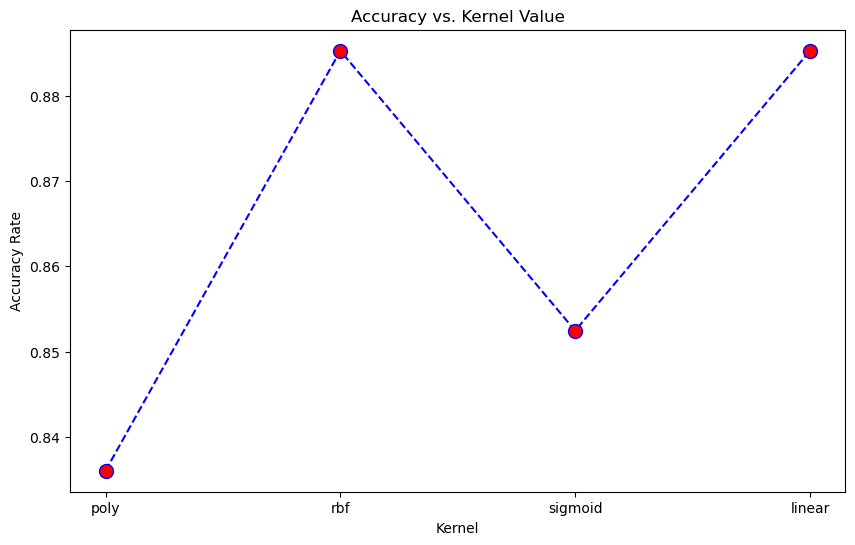

In [25]:
acc_rate = []
kernel_list = ['poly', 'rbf', 'sigmoid', 'linear']
for i in kernel_list:
    pred = SVM_predict(i, x_test)
    a = metrics.accuracy_score(y_test, pred)
    acc_rate.append(a)

plt.figure(figsize=(10,6))
plt.plot(kernel_list, acc_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. Kernel Value')
plt.xlabel('Kernel')
plt.ylabel('Accuracy Rate')
a = float('%.3f' % max(acc_rate))
print("Maximum test accuracy: ",a ,"at Kernel =",kernel_list[acc_rate.index(max(acc_rate))])

## Confusion matrix

Confusion matrix, without normalization


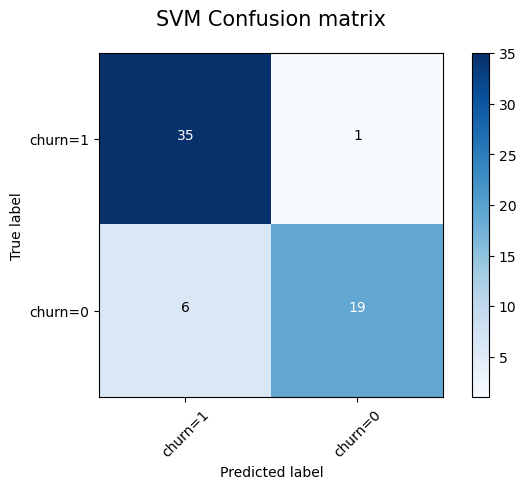

In [26]:
cnf_matrix = confusion_matrix(y_test, SVM_yhat_test, labels=[1,0])
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'], 
                      normalize= False, title='SVM Confusion matrix')